**Extracting Dataset using the Kaggle API**

In [3]:
# configuring the path of the Kaggle.json file

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json


import os

os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()  # Use the current directory where kaggle.json is located


In [4]:
!kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                           Car Price Dataset                                   135KB  2025-01-26 19:53:28           9280        122  1.0              
anandshaw2001/netflix-movies-and-tv-shows                          Netflix Movies and TV Shows                           1MB  2025-01-03 10:33:01          18120        459  1.0              
samithsachidanandan/most-popular-1000-youtube-videos               Most popular 1000 Youtube videos                     42KB  2025-01-27 18:36:29           2518         47  1.0              
adilshamim8/education-and-career-success     

Importing the Dog vs Cat Dataset form Kaggle

In [6]:
#  Kaggle api
# !kaggle competitions download -c dogs-vs-cats -p "C:/Users/Dell/Downloads/dogs_and_cat_dataset"
!kaggle competitions download -c dogs-vs-cats 


... resuming from 55574528 bytes (796002161 bytes left) ...




  7%|▋         | 53.0M/812M [00:00<?, ?B/s]
  7%|▋         | 54.0M/812M [00:01<21:52, 606kB/s]
  7%|▋         | 55.0M/812M [00:02<13:04, 1.01MB/s]
  7%|▋         | 56.0M/812M [00:02<10:15, 1.29MB/s]
  7%|▋         | 57.0M/812M [00:03<08:31, 1.55MB/s]
  7%|▋         | 58.0M/812M [00:03<07:56, 1.66MB/s]
  7%|▋         | 59.0M/812M [00:04<07:14, 1.82MB/s]
  7%|▋         | 60.0M/812M [00:04<06:37, 1.98MB/s]
  8%|▊         | 61.0M/812M [00:05<06:27, 2.03MB/s]
  8%|▊         | 62.0M/812M [00:06<07:29, 1.75MB/s]
  8%|▊         | 63.0M/812M [00:06<08:06, 1.61MB/s]
  8%|▊         | 64.0M/812M [00:07<08:05, 1.61MB/s]
  8%|▊         | 65.0M/812M [00:07<07:16, 1.80MB/s]
  8%|▊         | 66.0M/812M [00:08<06:33, 1.99MB/s]
  8%|▊         | 67.0M/812M [00:08<06:27, 2.02MB/s]
  8%|▊         | 68.0M/812M [00:09<06:29, 2.00MB/s]
  8%|▊         | 69.0M/812M [00:09<05:54, 2.20MB/s]
  9%|▊         | 70.0M/812M [00:10<06:17, 2.06MB/s]
  9%|▊         | 71.0M/812M [00:10<06:07, 2.11MB/s]
  9%|▉         | 72.

In [7]:
!ls


dogs-vs-cats.zip
env
kaggle.json
main.ipynb
requirements.txt


In [8]:
#  extracting the compressed file of the dataset

from zipfile import ZipFile

dataset = "dogs-vs-cats.zip"

try:
    with ZipFile(dataset, 'r') as zip_ref:
        zip_ref.extractall()
        print("Dataset extracted successfully!")
except Exception as e:
    print(f"Error: {e}")

Dataset extracted successfully!


In [9]:
#  extracting the compressed train file of the dataset
from zipfile import ZipFile

dataset = "train.zip"

try:
    with ZipFile(dataset, 'r') as zip_ref:
        zip_ref.extractall()
        print("Dataset extracted successfully!")
except Exception as e:
    print(f"Error: {e}")

Dataset extracted successfully!


In [11]:
import os

# counting the number of files in the train folder
path, dirs, files = next(os.walk("train"))
file_count = len(files)
print("Number of images: ", file_count)

Number of images:  25000


Printing the name of images

In [15]:
file_names = os.listdir("train")
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

Importing the dependencies

In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

Displaying the image of the dogs and cats

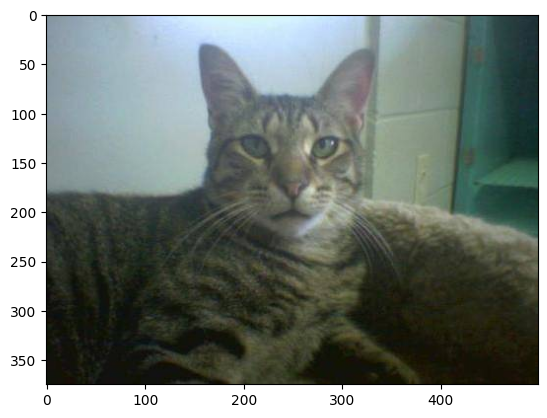

In [18]:
# display cat image
img = mpimg.imread("train\cat.9939.jpg")
imgplt = plt.imshow(img)
plt.show()

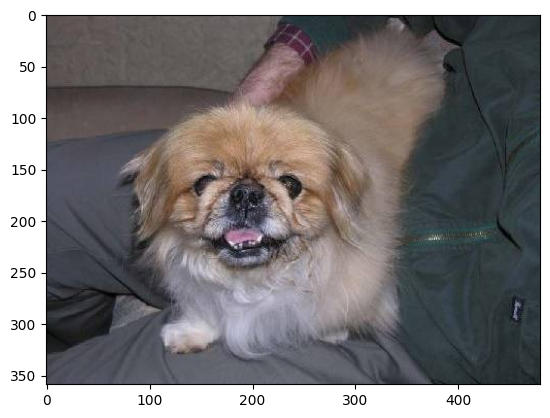

In [20]:
# display dog image
img = mpimg.imread("train\dog.167.jpg")
imgplt = plt.imshow(img)
plt.show()

Resizing all the images